# This document propose two models which can be used as base for semistable tokens

### We define the process in which we have a backup as Ethereum from an ICO and gradually use these to append commodities in this case Carbon Credits

**NOTE: this is only for educational ends, we do not promote investment or that what we explain here is a pure fact**

### First we start by some facts considerations in our models which give us the base maths their development 

We start by definig three base variables which might include our model

1. **CCTS** : *which stands for Carbon Credits Total Supply.*
2. **ETHTS** : *which stands for Ethereum Total Supply.*
3. **DTS** : *which stands for DECA Total Supply and where DECA es the name of our Token.*

Now base on this first defined variables the way to relate them regarding how most of ICO's currently work are these basic relations:

1. Relation between CCTS and DTS which we define as RCD:

\begin{equation*}
R_{CD} = \frac{CCTS}{DTS}
\end{equation*}

2. Relation between ETHTS and DTS which we define as RED:

\begin{equation*}
R_{ED} = \frac{ETHTS}{DTS}
\end{equation*}

3. Relation between CCTS and ETHTS which we define as RCE:

\begin{equation*}
R_{CE} = \frac{CCTS}{ETHTS}
\end{equation*}


## Numpy needed to test our Model 1 and 2 examples:


### Model 1 Proposal:

In [1]:
#%matplotlib inline 
%matplotlib notebook
import numpy as np

### Setup some variables, which are:

* Ethereum Price in USD as a variable Range (ethPrice)
* Carbon Credit Percentage backup Considered in Ethereum (ccPercentage)
* Total Investment Goal in USD (TotalInvestment)

In [2]:
#ethereum price USD
ethPrice = 170.02
#ccPercentage
ccPercentage = 0.5
#Total Investment USD
totalInvestment = 10000000

### Carbon Credits price in USD

since all the values are already in USD it is easy to get the percentace as price in usd:

\begin{equation*}
ccPriceSum(USD) = {TotalInvestment \times (\frac{ccPercentage}{100}}) 
\end{equation*}

### Carbon Credits price in Ethereum

Now in order to have them in Ethereum Units, since we want to ensure the percentage is fixed (static),
we should divide by the ethereum price:

\begin{equation*}
ccPriceSum(ETH) = \frac{TotalInvestment \times (\frac{ccPercentage}{100}) }{ethPrice}
\end{equation*}

which is the same as:

\begin{equation*}
ccPriceSum(ETH) = \frac{TotalInvestment \times ccPercentage}{100 \times ethPrice}
\end{equation*}

In [3]:
ccPriceSum = (totalInvestment * ccPercentage) / (100 * ethPrice)
print("Carbon Credits Total(ETH):{}".format(ccPriceSum))

Carbon Credits Total(ETH):294.0830490530526


### Now we calculate the Total Investmen goal in Ethereum

which is:

\begin{equation*}
ethPriceSum(ETH) = \frac{TotalInvestment}{ethPrice}
\end{equation*}

In [4]:
ethPriceSum = totalInvestment / ethPrice
print("Total Ethereums:{}".format(ethPriceSum))

Total Ethereums:58816.60981061051


### DECA Total Supply aprox example from the ethereum units

Now, based on the total Ethereums we got by the ICO  (ethPriceSum) 
and considering our promodates which are:

| PROMO  | TIME (weeks) | DECA TOKENS PER ETH |
|--------|--------------|---------------------|
| preICO | 1            | 300                 |
| Bonus1 | 2            | 275                 |
| Bonus2 | 3            | 250                 |
| ICO    | 5            | 225                 |

**We consider generating random numbers between that match promotios per ethereum that we got to reach our goal:** 

In [5]:
promo = [300,275,250,225]
DTSlst = np.random.randint(0, 4, int(ethPriceSum))
DTSlst = np.array(list(map(lambda x: promo[x], DTSlst)))
display(DTSlst)

array([275, 300, 275, ..., 300, 250, 225])

### Now we are going to consider 2.5% of the DECA Token Market Capital that goes to the contract owner, and get the DECA Total Suppy (DTS)

which is:

\begin{equation*}
DTS =  1.025 \times \sum_{k=1}^n DTSlst_k
\end{equation*}


In [6]:
#total supply per ethereums + decas to contract owner
DTS = 1.025* DTSlst.sum()
print("DECAS Total Supply:{}".format(DTS))

DECAS Total Supply:15831253.124999998


### Our model 1 is based on the relation between  the first cell equations 1 and 2 since it tries to consider CCTS  and ETHTS as components that in the relation with the DTS set us to an approachable price, we developt it as follows:

Considering: 

\begin{equation*}
R_{CD} + R_{ED} = 1
\end{equation*}

and by substitute their values from the first cell we get to:

\begin{equation*}
\frac{CCTS}{DTS} + \frac{ETHTS}{DTS} = 1
\end{equation*}

and it sould be possible to "verify by matching":

\begin{equation*}
CCTS + ETS = DTS
\end{equation*}


### Finally to get the DECA price in Ethereum (PPD) we consider next equation:

\begin{equation*}
PPD(ETH) = \frac{ccPriceSum(ETH) + ethPriceSum(ETH)}{DTS}
\end{equation*}

where PPD(ETH) is the Price per DECA in Ethereum units

**Please note that in this example is the last price after the ICO**

**Also note that we plan to add higher Carbon Credits percentage backup with the ETH we get after the ICO**
(which will be show in charts in a future document)

In [7]:
#Price Per Deca in ETH
PPD = (ccPriceSum + ethPriceSum) / DTS
print("Price per Deca:{}".format(PPD))

Price per Deca:0.0037337974696594694


### Last but not least, we check that our equations match by considering:

\begin{equation*}
ethPriceSum + ccPriceSum = PPD \times DTS
\end{equation*}

*Note that we do this in base of the past ecuation "verify by matching"* where:

\begin{equation*}
CCTS + ETS = DTS
\end{equation*}


In [8]:
#Verification Code:
assert (ethPriceSum+ccPriceSum==PPD*DTS), "Error in verification"
print('{0}={1}'.format(ethPriceSum+ccPriceSum,PPD*DTS))

59110.69285966356=59110.69285966356


### As a pie chart fist distribution approach looks like the following:

<IPython.core.display.Javascript object>


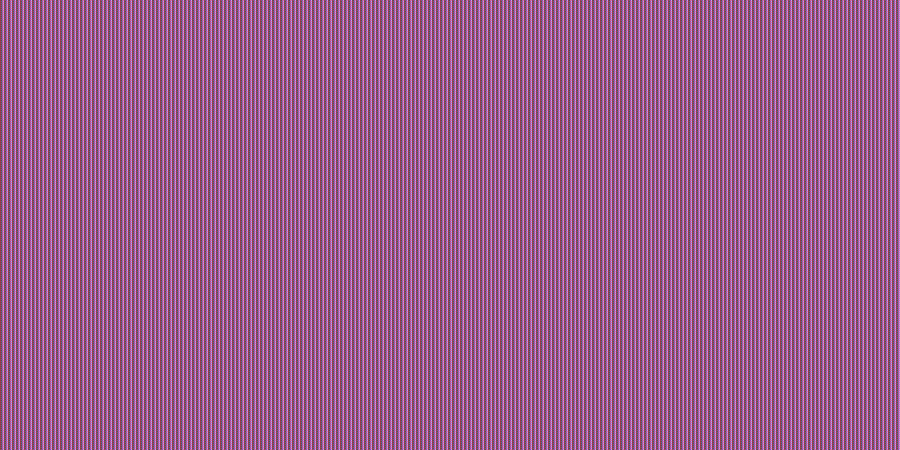

In [9]:
import matplotlib.pyplot as plt
#the pie chart
fig, ax = plt.subplots(figsize=(9, 4.5), subplot_kw=dict(aspect="equal"))

commodities = ["{} Carbon_Credits".format(ccPriceSum),
          "{} Ethereum".format(ethPriceSum)]

data = [float(x.split()[0]) for x in commodities]
backup = [x.split()[-1] for x in commodities]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} ETH)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, backup,
          title="DECAs Backup",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("DECA: Commodities")

plt.show()